<span style="color:red; font-size:20px;">Câu 1</span>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('nguoidung_sudung.csv',header=0,delimiter=',',encoding='utf-8')
df

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


In [3]:
df = pd.read_csv('nguoidung_thietbi.csv',header=0,delimiter=',',encoding='utf-8')
df

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


In [4]:
df = pd.read_csv('thietbi.csv',header=0,delimiter=',',encoding='utf-8')
df

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


In [5]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

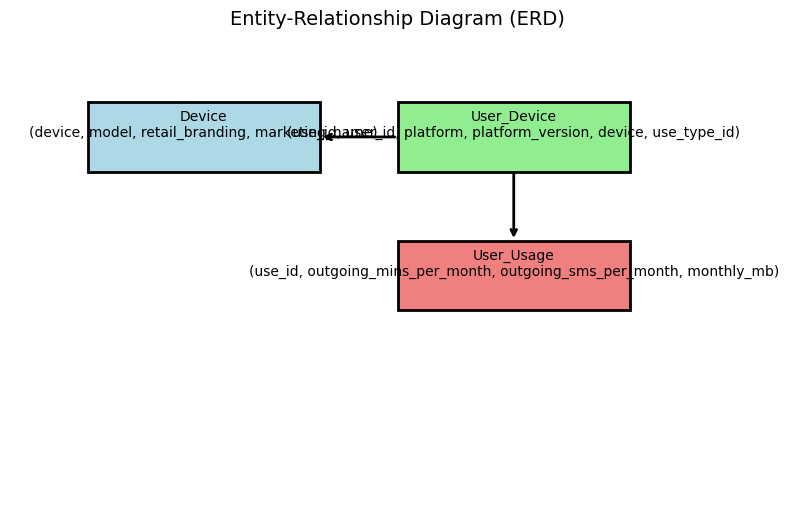

In [6]:
import matplotlib.pyplot as plt

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the entities as boxes (rectangles)
device_box = plt.Rectangle((0.1, 0.7), 0.3, 0.15, fc='lightblue', edgecolor='black', lw=2)
user_device_box = plt.Rectangle((0.5, 0.7), 0.3, 0.15, fc='lightgreen', edgecolor='black', lw=2)
user_usage_box = plt.Rectangle((0.5, 0.4), 0.3, 0.15, fc='lightcoral', edgecolor='black', lw=2)

# Add the boxes to the plot
ax.add_patch(device_box)
ax.add_patch(user_device_box)
ax.add_patch(user_usage_box)

# Add text labels to the entities
ax.text(0.25, 0.775, 'Device\n(device, model, retail_branding, marketing_name)', fontsize=10, ha='center')
ax.text(0.65, 0.775, 'User_Device\n(use_id, user_id, platform, platform_version, device, use_type_id)', fontsize=10, ha='center')
ax.text(0.65, 0.475, 'User_Usage\n(use_id, outgoing_mins_per_month, outgoing_sms_per_month, monthly_mb)', fontsize=10, ha='center')

# Draw the relationships (arrows)
ax.annotate("", xy=(0.4, 0.775), xytext=(0.5, 0.775), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0.65, 0.55), xytext=(0.65, 0.7), arrowprops=dict(arrowstyle="->", lw=2))

# Set limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the ERD plot
plt.title('Entity-Relationship Diagram (ERD)', fontsize=14)
plt.show()

<span style="color:red; font-size:20px;">Câu 3</span>

In [7]:
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name': 'MarketingName'}, inplace=True)

<span style="color:red; font-size:20px;">Câu 4</span>

In [8]:
dfKetQua = pd.merge (nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


<span style="color:red; font-size:20px;">Câu 5</span>

In [9]:
# hoặc left-join
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id', how='left')


In [10]:
# câu 5
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], left_on='device', right_on='Model')

<span style="color:red; font-size:20px;">Câu 6</span>

In [11]:
#câu 6
dfKetQua[dfKetQua.device.str.startswith('GT')].head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300
53,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300
56,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
57,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
62,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505
69,16.24,18.82,1557.33,22887,android,GT-I9195,Samsung,GT-I9195


<span style="color:red; font-size:20px;">Câu 7</span>

In [12]:
#câu 7
dfKetQua.groupby ('Branding').agg({
'outgoing_mins_per_month':'mean',
'outgoing_sms_per_month':'mean',
'monthly_mb':'mean',
'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


<span style="color:red; font-size:20px;">Câu 8</span>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18624\1781709593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y= 'Branding', data = dfKetQua, palette=colors)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18624\1781709593.py:4: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y= 'Branding', data = dfKetQua, palette=colors)


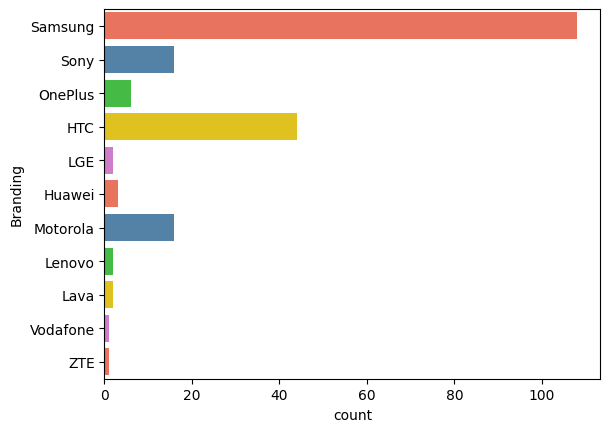

In [13]:
#câu 8
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#DA70D6']  # Có thể chỉnh màu tùy thích

sns.countplot(y= 'Branding', data = dfKetQua, palette=colors)
plt.show()

<span style="color:red; font-size:20px;">Câu 9</span>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18624\3531749977.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, ci=None)


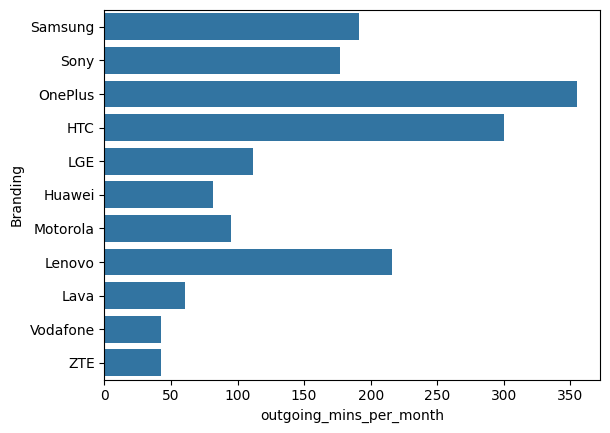

In [14]:
# câu 9
# Vẽ biểu đồ barplot không có gạch error bar
sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, ci=None)

# Hiển thị biểu đồ
plt.show()

<span style="color:red; font-size:20px;">Câu 10</span>

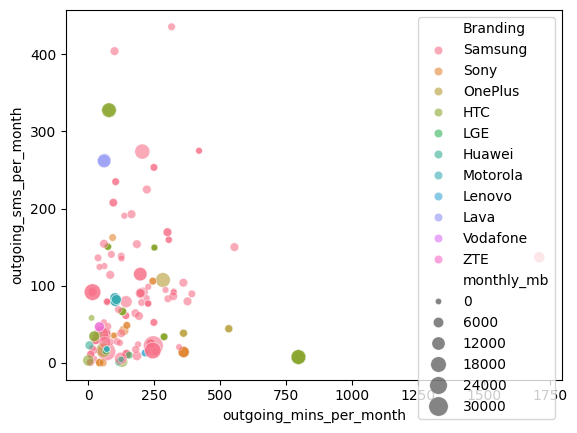

In [15]:
#10
sns.scatterplot(data=dfKetQua, x='outgoing_mins_per_month', y='outgoing_sms_per_month', 
                hue='Branding', size='monthly_mb', sizes=(20, 200), 
                alpha=0.6, legend='brief')

plt.show()

In [16]:
print(df.columns)


Index(['Retail Branding', 'Marketing Name', 'Device', 'Model'], dtype='object')


<span style="color:red; font-size:20px;">Câu 11</span>


In [17]:
import scipy.stats as stats

# Lấy cột 'outgoing_mins_per_month' từ dfKetQua
outgoing_mins = dfKetQua['outgoing_mins_per_month']

# Thực hiện kiểm định t một mẫu với giả thuyết trung bình bằng 200
t_statistic, p_value = stats.ttest_1samp(outgoing_mins, 200)

# Hiển thị kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 200 phút.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 200 phút.")


T-statistic: 0.3678324474067915
P-value: 0.7133871524810331
Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 200 phút.


<span style="color:red; font-size:20px;">Câu 12</span>

In [18]:
import scipy.stats as stats

# Lấy cột 'outgoing_mins_per_month' từ dfKetQua
outgoing_mins = dfKetQua['outgoing_sms_per_month']

# Thực hiện kiểm định t một mẫu với giả thuyết trung bình bằng 200
t_statistic, p_value = stats.ttest_1samp(outgoing_mins, 100)

# Hiển thị kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 100 phút.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 200 phút.")


T-statistic: -2.9567085781961198
P-value: 0.003483493850205251
Bác bỏ giả thuyết H0: Trung bình không bằng 100 phút.


<span style="color:red; font-size:20px;">Câu 13</span>

In [19]:
import scipy.stats as stats

# Lấy cột 'outgoing_mins_per_month' từ dfKetQua
outgoing_mins = dfKetQua['monthly_mb']

# Thực hiện kiểm định t một mẫu với giả thuyết trung bình bằng 200
t_statistic, p_value = stats.ttest_1samp(outgoing_mins, 2048)

# Hiển thị kết quả
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Trung bình không bằng 2048 phút.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Trung bình bằng 200 phút.")




T-statistic: 5.918078326415772
P-value: 1.3950238813156428e-08
Bác bỏ giả thuyết H0: Trung bình không bằng 2048 phút.


<span style="color:red; font-size:20px;">Câu 14</span>

In [20]:
import pandas as pd

# 1. Chọn các cột cần tính ma trận tương quan
cols = ['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']

# 2. Tạo ma trận tương quan cho các cột đã chọn
corr_matrix = dfKetQua[cols].corr()

# 3. Chuyển ma trận tương quan từ dạng bảng (DataFrame) thành dạng chuỗi (Series)
#    để dễ dàng sắp xếp và xử lý
corr_series = corr_matrix.unstack()

# 4. Sắp xếp các giá trị tương quan từ thấp đến cao
sorted_corr = corr_series.sort_values()

# 5. Loại bỏ các giá trị tự tương quan (giá trị tương quan bằng 1) vì chúng không cần thiết
sorted_corr = sorted_corr[sorted_corr != 1]

# 6. In ma trận tương quan đã sắp xếp
print(sorted_corr)


monthly_mb               outgoing_sms_per_month    -0.046049
outgoing_sms_per_month   monthly_mb                -0.046049
outgoing_mins_per_month  outgoing_sms_per_month    -0.016494
outgoing_sms_per_month   outgoing_mins_per_month   -0.016494
monthly_mb               outgoing_mins_per_month    0.213489
outgoing_mins_per_month  monthly_mb                 0.213489
dtype: float64


<span style="color:red; font-size:20px;">Câu 15</span>

In [21]:
import scipy.stats as stats

# Lấy dữ liệu từ hai cột
x = dfKetQua['outgoing_mins_per_month']
y = dfKetQua['outgoing_sms_per_month']

# Thực hiện kiểm định Pearson
corr_coef, p_value = stats.pearsonr(x, y)

# In kết quả
print(f"Hệ số tương quan Pearson: {corr_coef}")
print(f"P-value: {p_value}")

# Kết luận
alpha = 0.05  # Mức ý nghĩa 5%
if p_value < alpha:
    print("Có bằng chứng thống kê cho thấy có sự tương quan giữa hai biến.")
else:
    print("Không có bằng chứng thống kê để kết luận hai biến có tương quan.")


Hệ số tương quan Pearson: -0.01649444168531939
P-value: 0.8162223636414785
Không có bằng chứng thống kê để kết luận hai biến có tương quan.


<span style="color:red; font-size:20px;">Câu 16</span>

In [22]:

# Tạo bảng tần số chéo giữa platform và branding
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])

# Thực hiện kiểm định Chi-squared
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Hiển thị kết quả
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Có mối quan hệ giữa platform và branding.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Không có mối quan hệ giữa platform và branding.")

Chi-squared statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Không đủ bằng chứng bác bỏ giả thuyết H0: Không có mối quan hệ giữa platform và branding.


<span style="color:red; font-size:20px;">Câu 17</span>

In [23]:

# Tạo bảng tần số chéo giữa platform và branding
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['monthly_mb'])

# Thực hiện kiểm định Chi-squared
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Hiển thị kết quả
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")

# Kiểm định mức ý nghĩa alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ giả thuyết H0: Có mối quan hệ giữa platform và  monthly_mb.")
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0: Không có mối quan hệ giữa platform và  monthly_mb.")

Chi-squared statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Không đủ bằng chứng bác bỏ giả thuyết H0: Không có mối quan hệ giữa platform và  monthly_mb.


<span style="color:red; font-size:20px;">Câu 18</span>

In [24]:
# Câu 18
import scipy.stats as stats
import pandas as pd

# Lặp qua từng nhóm Branding và thực hiện kiểm định cho mỗi nhóm
for brand in dfKetQua['Branding'].unique():
    # Lọc dữ liệu theo từng loại branding
    df_brand = dfKetQua[dfKetQua['Branding'] == brand]
    
    # Nhóm dữ liệu theo platform và kiểm tra giá trị monthly_mb
    groups = [df_brand[df_brand['platform'] == platform]['monthly_mb'] for platform in df_brand['platform'].unique()]
    
    # Chỉ thực hiện kiểm định nếu có ít nhất 2 nhóm với dữ liệu
    valid_groups = [group for group in groups if len(group) > 1]
    
    if len(valid_groups) > 1:
        # Thực hiện kiểm định ANOVA một chiều
        f_stat, p_value = stats.f_oneway(*valid_groups)
        
        # Hiển thị kết quả cho từng loại branding
        print(f"Kết quả kiểm định cho Branding: {brand}")
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")
        
        # Kiểm định mức ý nghĩa alpha = 0.05
        alpha = 0.05
        if p_value < alpha:
            print(f"-> Bác bỏ giả thuyết H0: Có sự khác biệt về monthly_mb giữa các platform cho {brand}.")
        else:
            print(f"-> Không đủ bằng chứng bác bỏ giả thuyết H0: Không có sự khác biệt về monthly_mb giữa các platform cho {brand}.")
    else:
        print(f"Không đủ dữ liệu để thực hiện kiểm định cho Branding: {brand}\n")


Không đủ dữ liệu để thực hiện kiểm định cho Branding: Samsung

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Sony

Không đủ dữ liệu để thực hiện kiểm định cho Branding: OnePlus

Không đủ dữ liệu để thực hiện kiểm định cho Branding: HTC

Không đủ dữ liệu để thực hiện kiểm định cho Branding: LGE

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Huawei

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Motorola

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Lenovo

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Lava

Không đủ dữ liệu để thực hiện kiểm định cho Branding: Vodafone

Không đủ dữ liệu để thực hiện kiểm định cho Branding: ZTE



<span style="color:red; font-size:20px;">Câu 19</span>

In [25]:
import pandas as pd
import statsmodels.api as sm

# Chọn các biến độc lập và biến phụ thuộc
X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']

# Thêm hằng số vào mô hình (intercept)
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# In ra tóm tắt kết quả của mô hình
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             monthly_mb   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 07 Sep 2024   Prob (F-statistic):            0.00818
Time:                        20:07:43   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

<span style="color:red; font-size:20px;">Câu 20</span>

In [26]:


import pandas as pd
import statsmodels.api as sm


# Xác định biến độc lập (outgoing_mins_per_month, outgoing_sms_per_month) và biến phụ thuộc (monthly_mb)
X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]
y = dfKetQua['monthly_mb']

# Thêm hằng số vào mô hình (intercept)
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Hàm dự báo dung lượng monthly_mb dựa trên input từ người dùng
def predict_monthly_mb(outgoing_mins, outgoing_sms):
    # Chuẩn bị dữ liệu đầu vào cho mô hình dự đoán
    X_new = pd.DataFrame({'const': [1], 'outgoing_mins_per_month': [outgoing_mins], 'outgoing_sms_per_month': [outgoing_sms]})
    
    # Dự đoán giá trị monthly_mb
    predicted_mb = model.predict(X_new)
    return predicted_mb[0]

# Main program
if __name__ == "__main__":
    # Nhập giá trị từ người dùng
    try:
        outgoing_mins_per_month = float(input("Nhập số phút gọi trong tháng (outgoing_mins_per_month): "))
        outgoing_sms_per_month = float(input("Nhập số tin nhắn trong tháng (outgoing_sms_per_month): "))

        # Dự đoán dung lượng dữ liệu monthly_mb
        predicted_mb = predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month)

        # Hiển thị kết quả
        print(f"Dung lượng dữ liệu dự báo cho tháng (monthly_mb): {predicted_mb:.2f} MB")
    except ValueError:
        print("Vui lòng nhập số hợp lệ cho số phút gọi và tin nhắn.")

Dung lượng dữ liệu dự báo cho tháng (monthly_mb): 3543.20 MB
